## Exploracion de datos
En este cuaderno se realizará un análisis exploratorio de los datos , exponiendo estadisticas y tendencias importantes que nos permitan evidenciar comportamientos y patrones para la posterior realizacion del modelo de decision.

In [2]:
#Importacion librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Se carga el archivo de datos previamente filtrado
data = pd.read_csv('data.csv', sep=",")
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [4]:
data.shape

(30000, 25)

## Explicacion de las columnas:
**Limit_Bal** : Monto del crédito otorgado en dolares Taiwaneses, incluye tanto el crédito individual del consumidor como el crédito familiar.

**Sex**: género 1: Masculino, 2:Femenino

**Education**:nivel educativo  1: Escuela de Postgrado , 2:Universidad, 3: Escuela Secundaria , 4: Otros 

**Marriage**: Estado civil 1. Casado, 2: soltero , 3: otros

**Age**: Edad , Cantidad de años

#HISTORIAL DE PAGOS

**PAY_0** : "Registros de pagos mensuales pasados de abril a septie

**PAY_N** : hacen referencia a los pagos históricos mensuales. estado de pago es: 1 = pago puntual; 1 = retraso de pago de un mes; 2 = retraso de pago de dos meses; ...; 8 = retraso de pago de ocho meses; 9 = retraso de pago de nueve meses o más

**Bill_AMTN** : Monto del pago anterior en dolares Taiwaneses

**PAY_AMT6**: Monto del pago actual mensual

Datos e información recopilada del artículo científico :
Yeh, I.-C., & Lien, C. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473–2480.

## Estadisticas Descriptivas

In [5]:
data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [17]:
# Calcula la correlación entre las variables
correlacion = data.corr()
# Calcula la covarianza entre las variables
covarianza = data.cov()
# Calcula percentiles específicos, por ejemplo, percentil 25, 50 y 75
percentiles = data.quantile([0.25, 0.50, 0.75])
print('Covarianza')
print(covarianza)

Covarianza
                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.69433

In [19]:
print('Percentiles 0.25 , 0.50 , 0.75')
print(percentiles)

Percentiles 0.25 , 0.50 , 0.75
            ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0.25   7500.75    50000.0  1.0        1.0       1.0  28.0   -1.0   -1.0   
0.50  15000.50   140000.0  2.0        2.0       2.0  34.0    0.0    0.0   
0.75  22500.25   240000.0  2.0        2.0       2.0  41.0    0.0    0.0   

      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0.25   -1.0   -1.0  ...    2326.75     1763.0    1256.00    1000.0     833.0   
0.50    0.0    0.0  ...   19052.00    18104.5   17071.00    2100.0    2009.0   
0.75    0.0    0.0  ...   54506.00    50190.5   49198.25    5006.0    5000.0   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0.25     390.0    296.00     252.5    117.75                         0.0  
0.50    1800.0   1500.00    1500.0   1500.00                         0.0  
0.75    4505.0   4013.25    4031.5   4000.00                         0.0  

[3 rows x 25 columns]


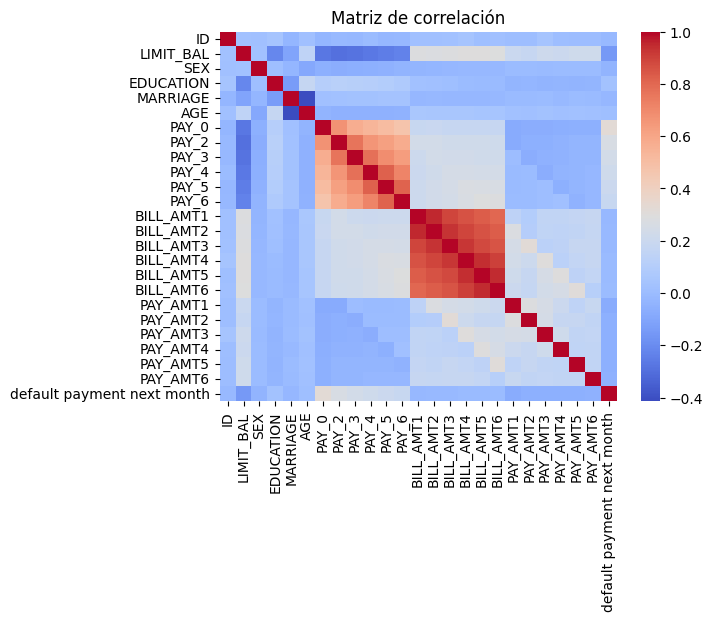

In [21]:
#Matriz de correlacion
sns.heatmap(correlacion, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

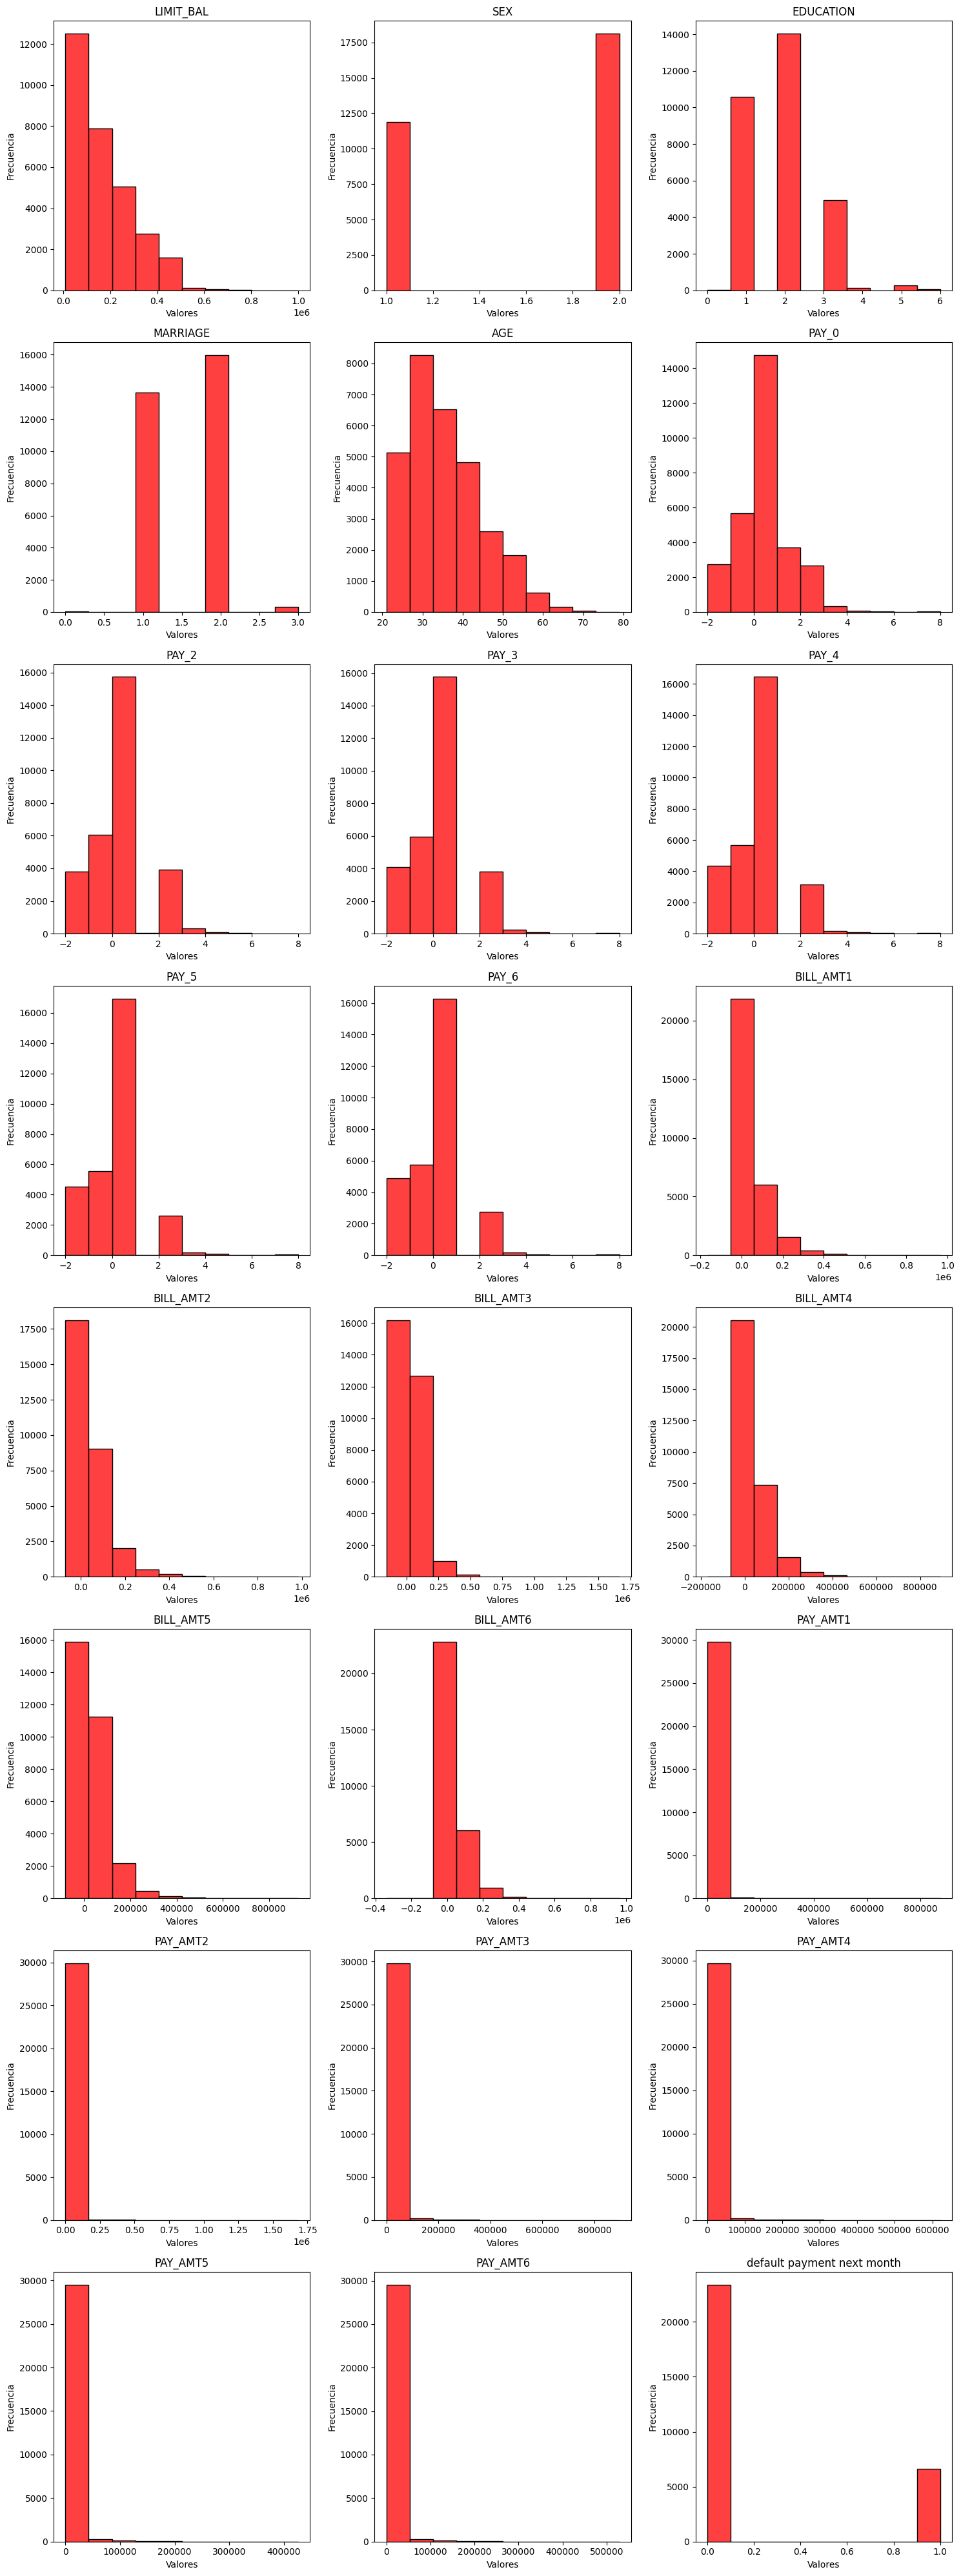

In [6]:
# Creamos los histogramas para cada una de las variables
columnas = [col for col in data.columns if col != 'ID']
num_filas = len(columnas) // 3 + (1 if len(columnas) % 3 != 0 else 0)
num_columnas = 3

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

for i, columna in enumerate(columnas):
    fila = i // num_columnas
    columna_subplot = i % num_columnas
    sns.histplot(data[columna], bins=10, kde=False, color='red', ax=axes[fila, columna_subplot])
    axes[fila, columna_subplot].set_xlabel('Valores')
    axes[fila, columna_subplot].set_ylabel('Frecuencia')
    axes[fila, columna_subplot].set_title(f'{columna}')

plt.tight_layout()
plt.show()

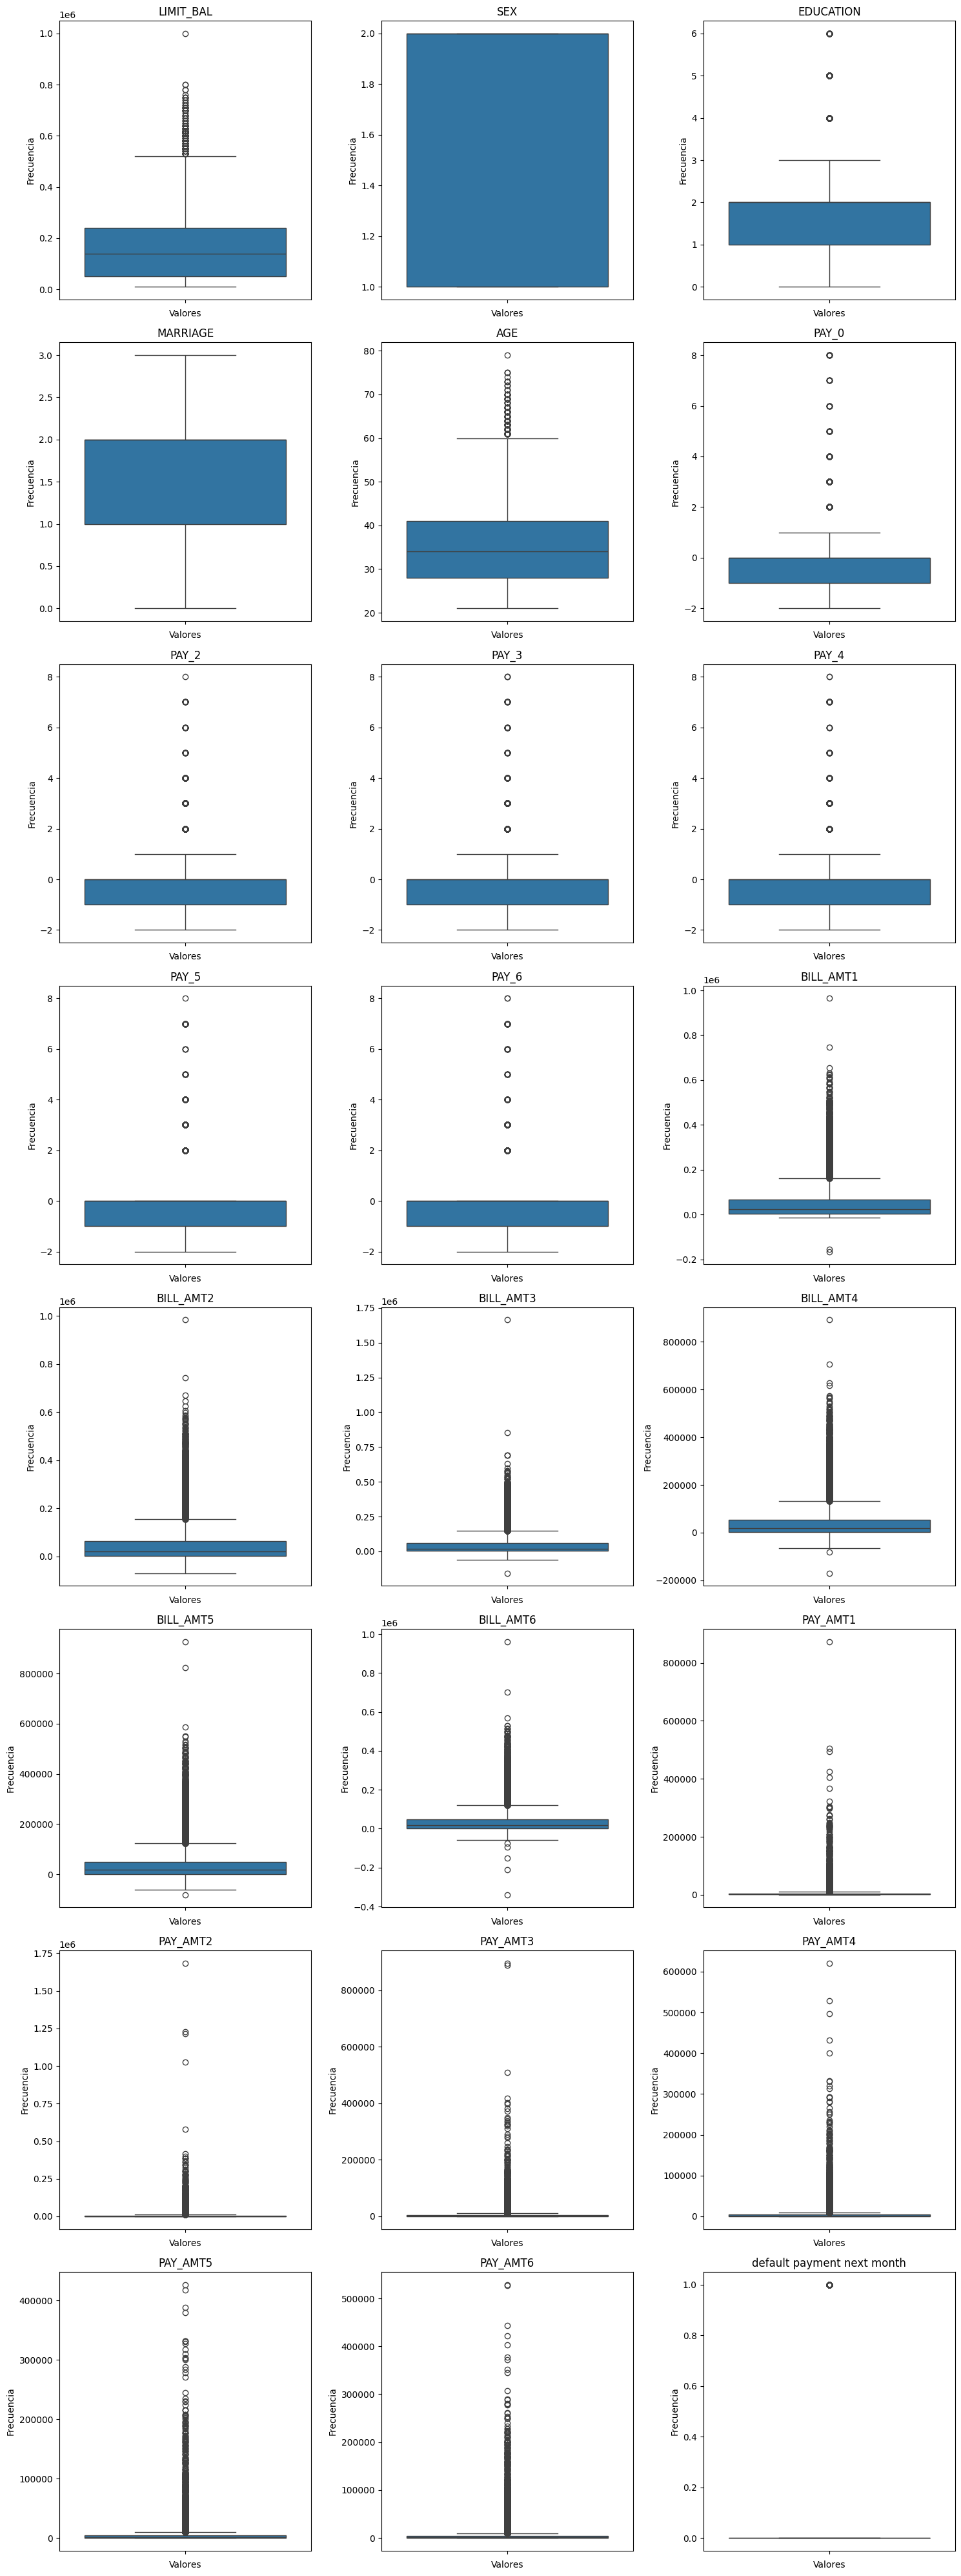

In [7]:
#Diagramas de Caja
columnas = [col for col in data.columns if col != 'ID']

num_filas = len(columnas) // 3 + (1 if len(columnas) % 3 != 0 else 0)
num_columnas = 3

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

for i, columna in enumerate(columnas):
    fila = i // num_columnas
    columna_subplot = i % num_columnas
    sns.boxplot(data[columna], ax=axes[fila, columna_subplot])
    axes[fila, columna_subplot].set_xlabel('Valores')
    axes[fila, columna_subplot].set_ylabel('Frecuencia')
    axes[fila, columna_subplot].set_title(f'{columna}')

plt.tight_layout()
plt.show()

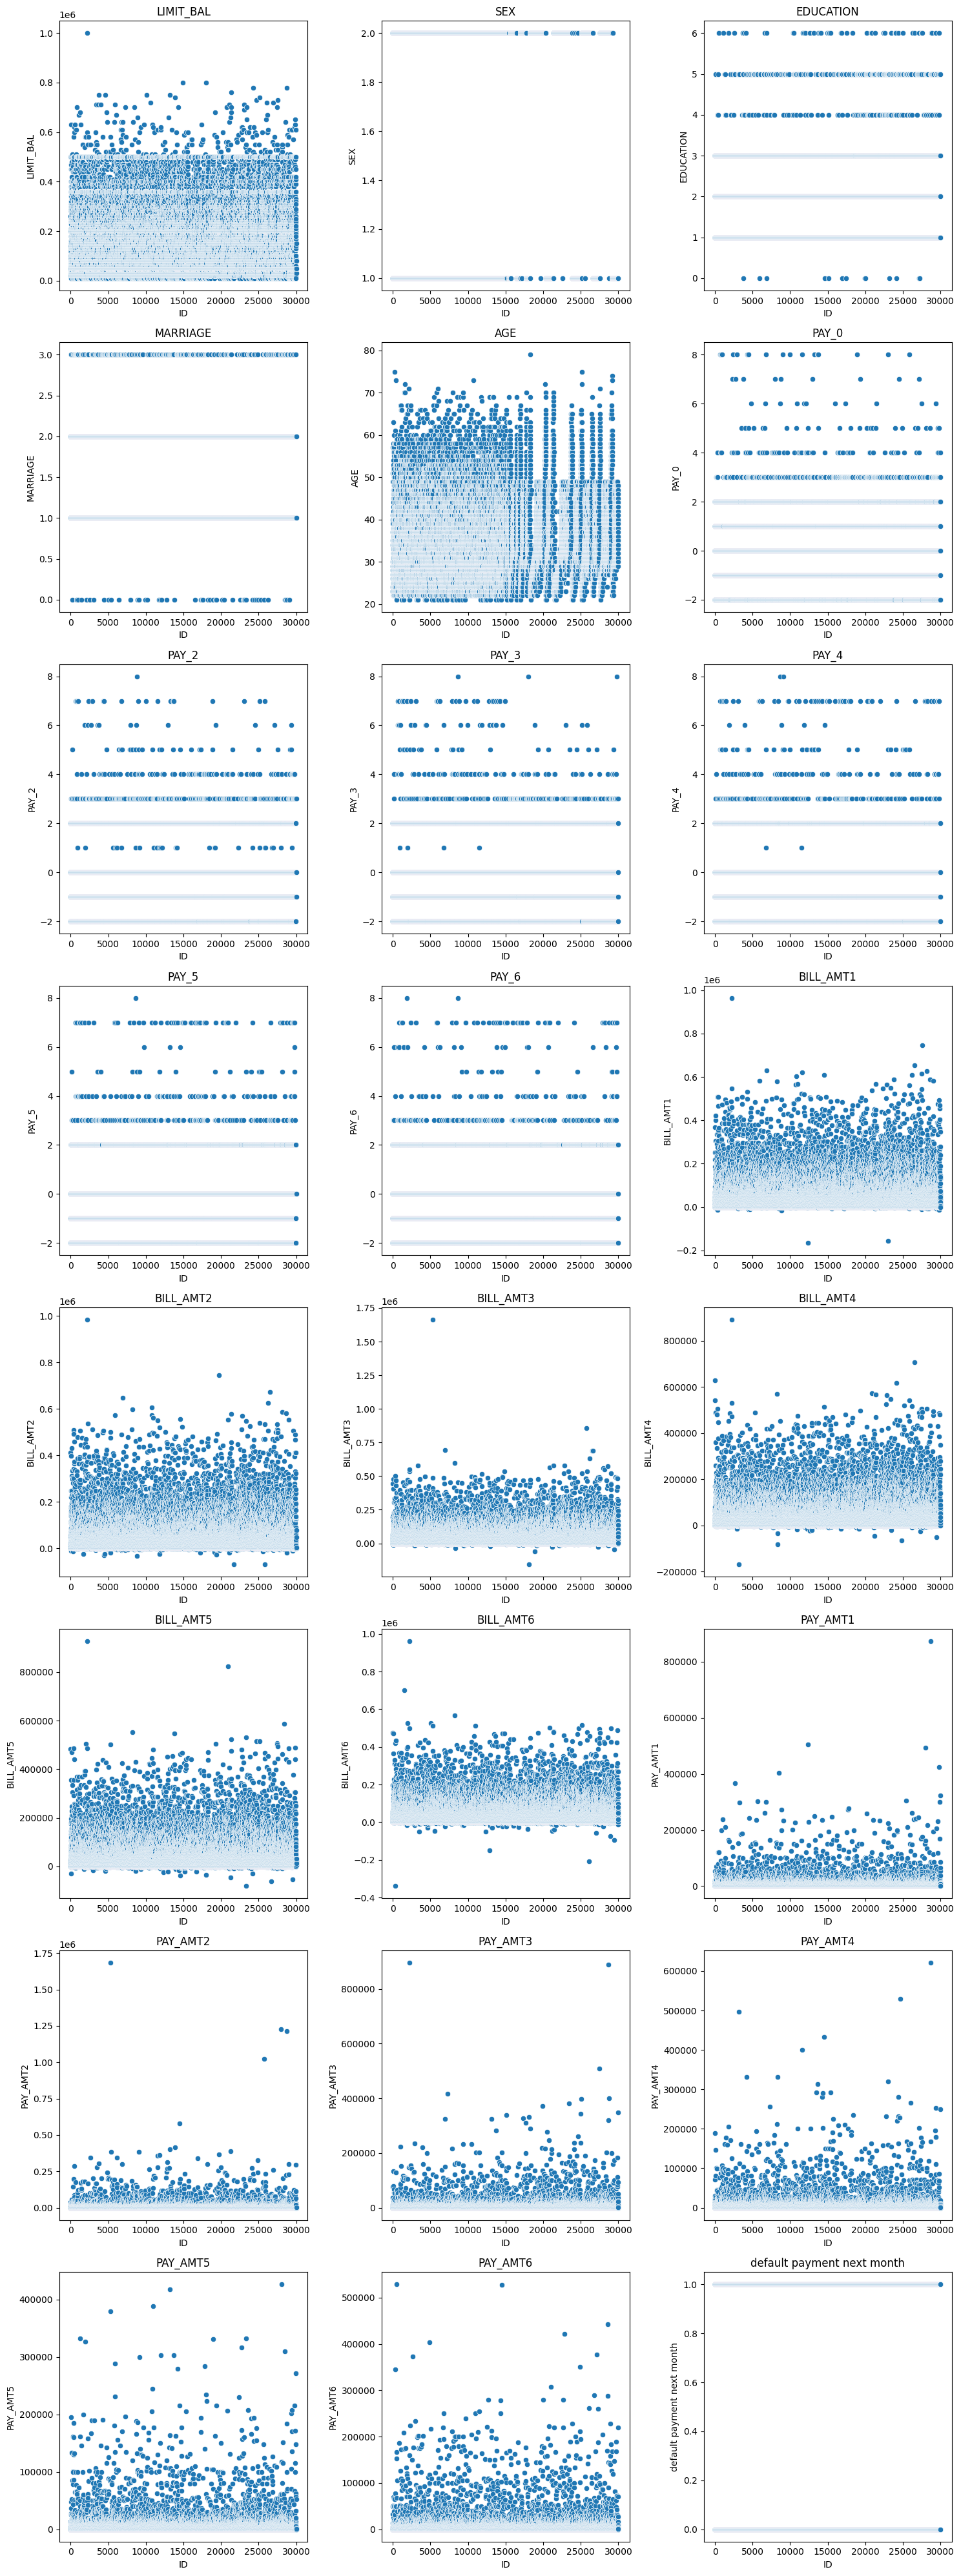

In [8]:
# Diagramas de dispersion
columnas = [col for col in data.columns if col != 'ID']
num_filas = len(columnas) // 3 + (1 if len(columnas) % 3 != 0 else 0)
num_columnas = 3
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

for i, columna in enumerate(columnas):
    fila = i // num_columnas
    columna_subplot = i % num_columnas
    sns.scatterplot(data=data, x='ID', y=columna, ax=axes[fila, columna_subplot])
    axes[fila, columna_subplot].set_xlabel('ID')
    axes[fila, columna_subplot].set_ylabel(columna)
    axes[fila, columna_subplot].set_title(f'{columna}')

plt.tight_layout()
plt.show()

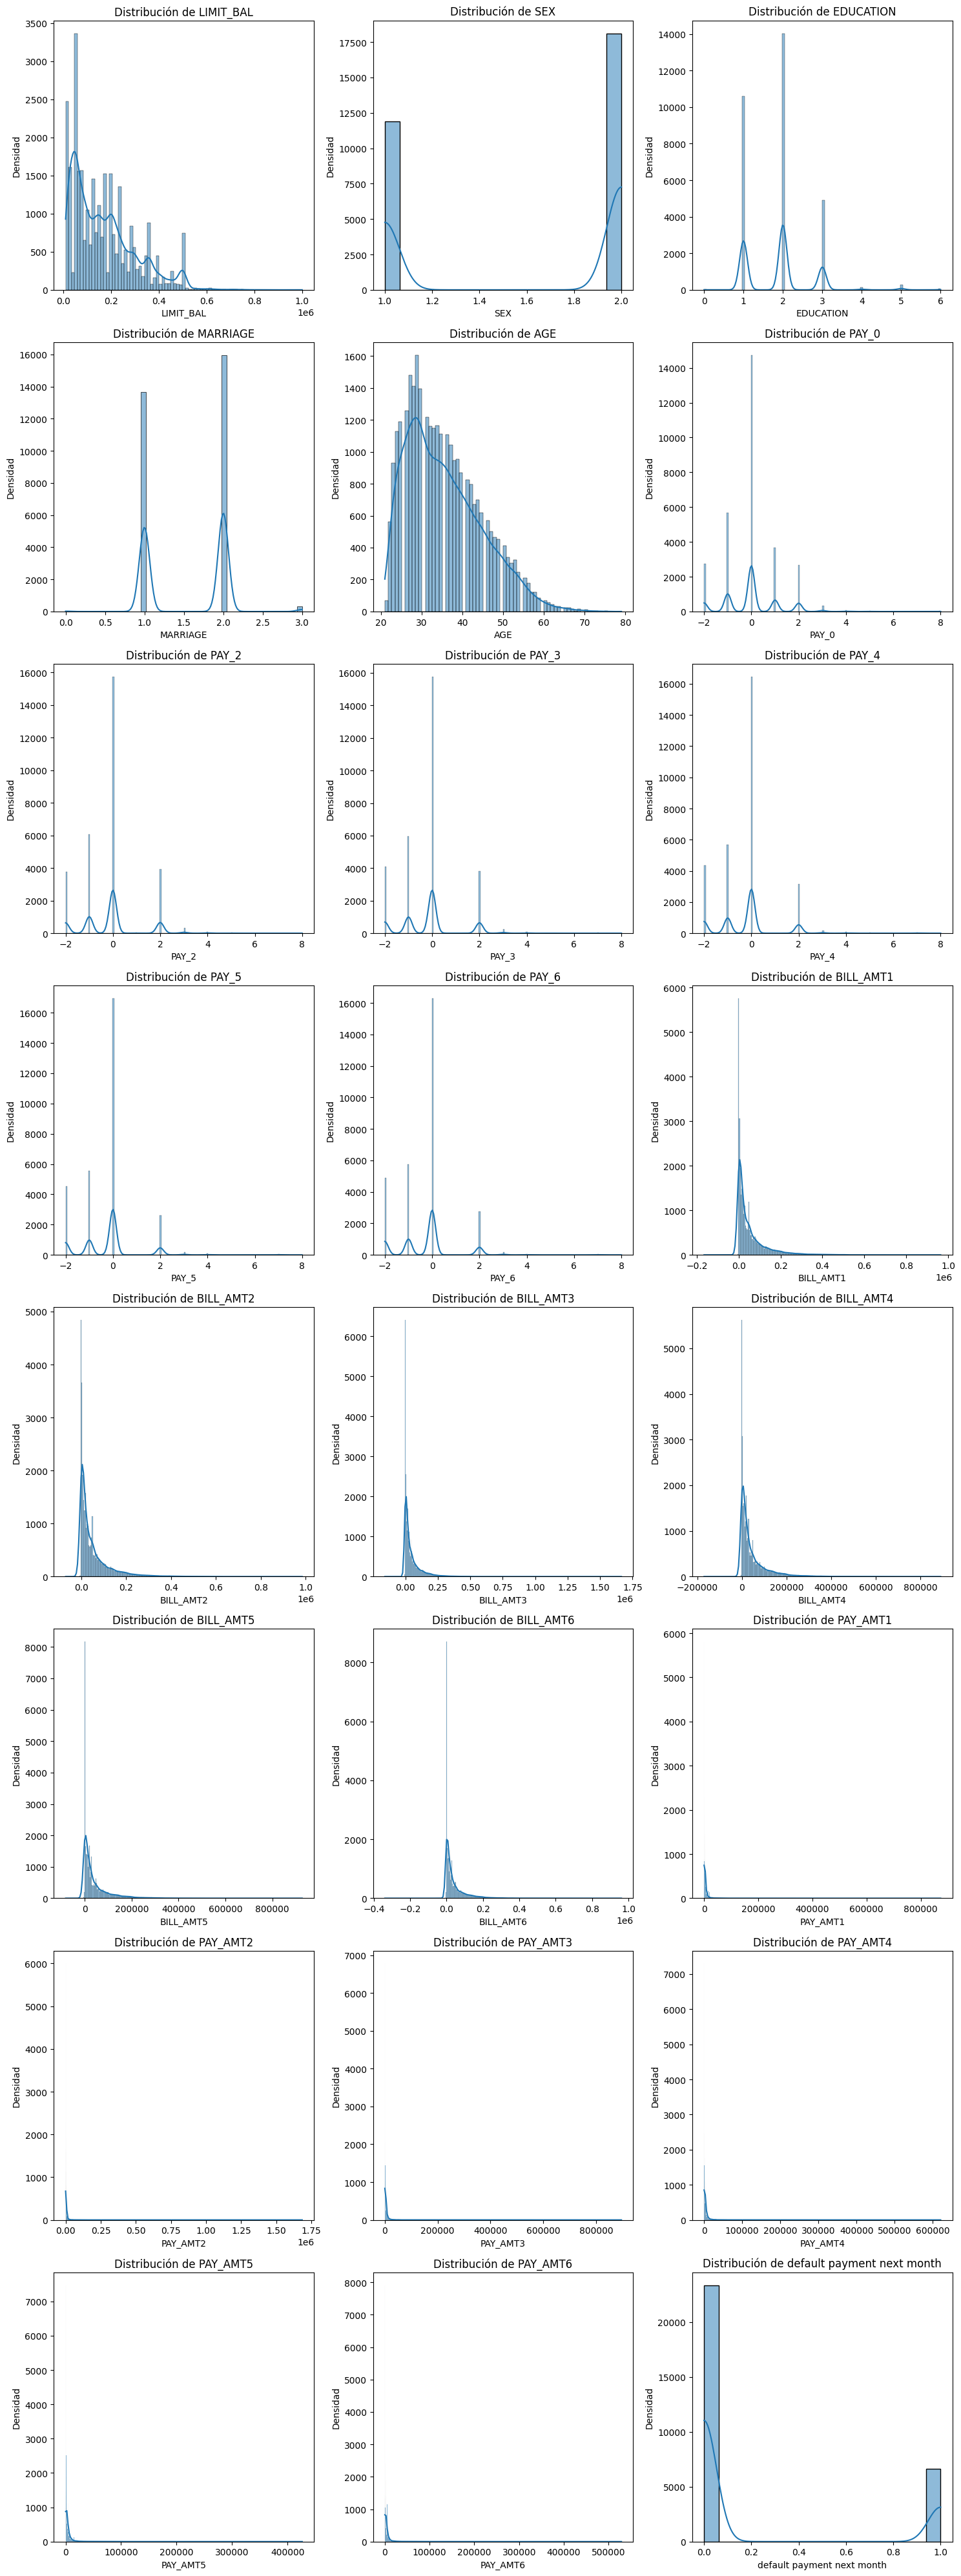

In [12]:
#Graficos de Violin
columnas = [col for col in data.columns if col != 'ID']
num_filas = len(columnas) // 3 + (1 if len(columnas) % 3 != 0 else 0)
num_columnas = 3
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

for i, columna in enumerate(columnas):
    fila = i // num_columnas
    columna_subplot = i % num_columnas
    sns.histplot(data[columna], ax=axes[fila, columna_subplot], kde=True)
    axes[fila, columna_subplot].set_xlabel(columna)
    axes[fila, columna_subplot].set_ylabel('Densidad')
    axes[fila, columna_subplot].set_title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()

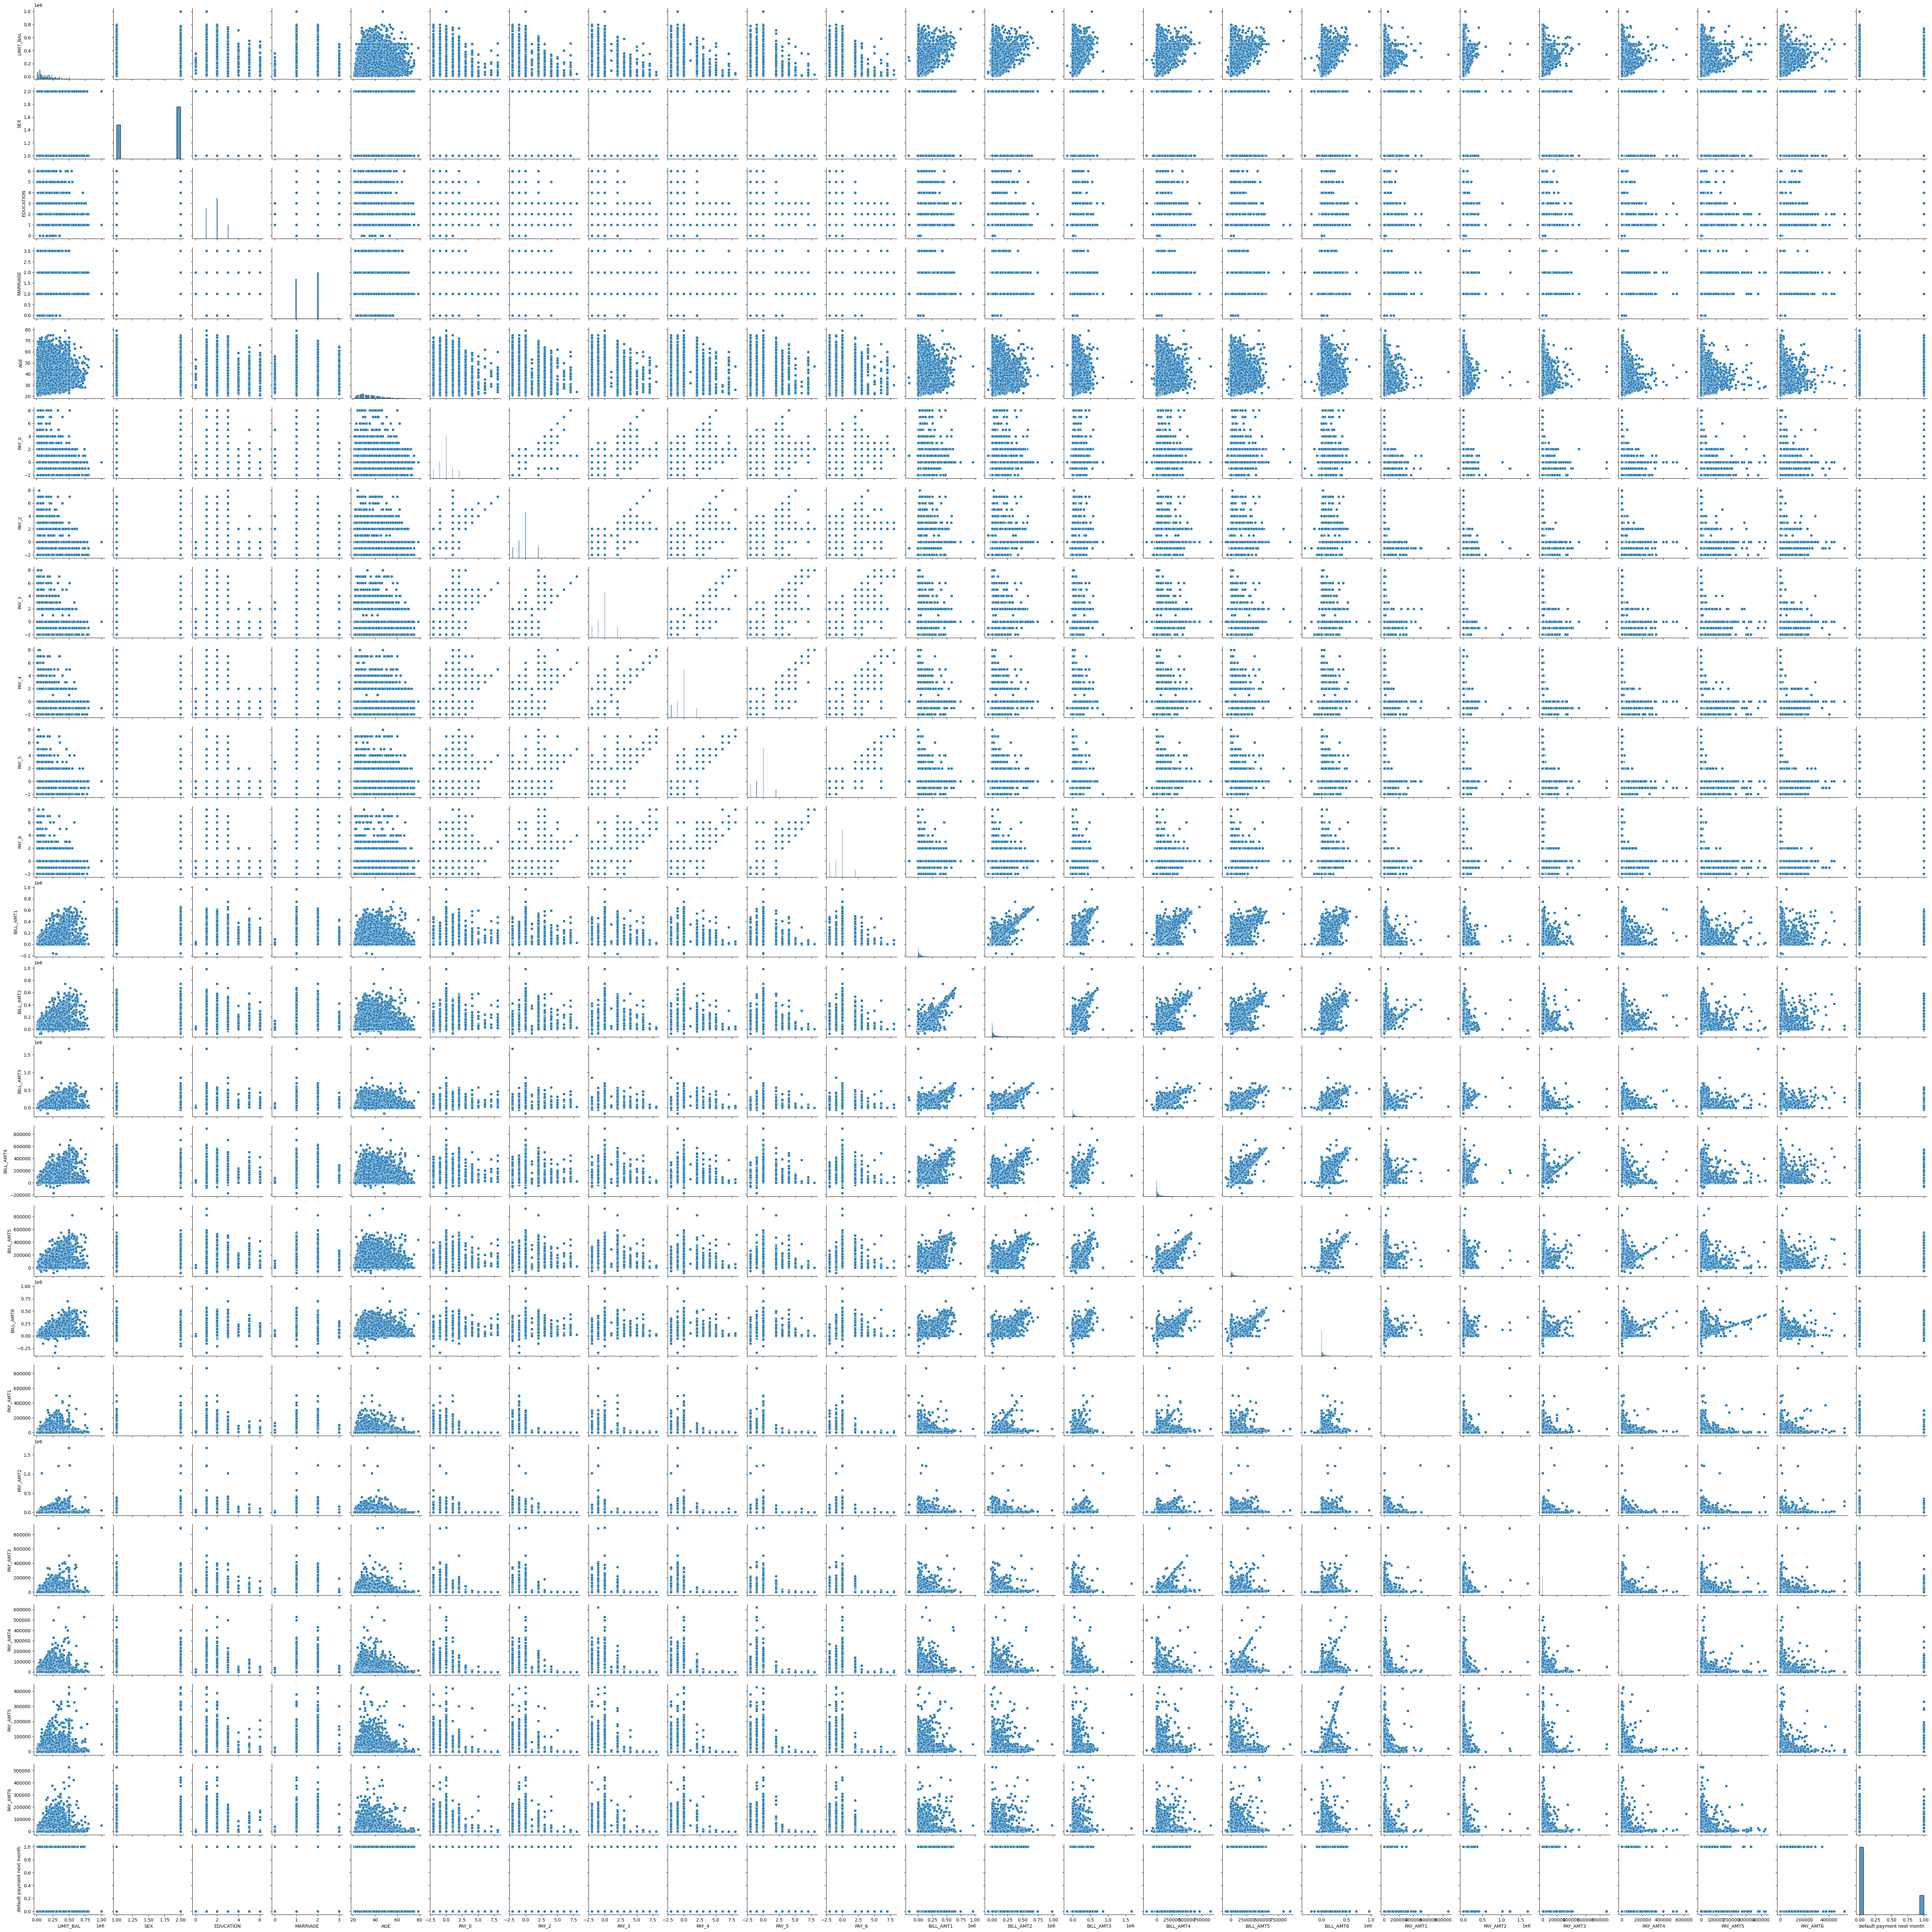

In [13]:
#PairPlot
columnas = [col for col in data.columns if col != 'ID']
sns.pairplot(data[columnas])
plt.show()